<a href="https://colab.research.google.com/github/Y0U0/Imersao-Python-Alura/blob/main/Imersao_Python_Alura_Aula4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install mplfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 1.3 MB/s eta 0:00:00


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import mplfinance as mpf
import yfinance as yf
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [5]:
dados = yf.download('PETR4.SA', start='2023-01-01', end='2023-12-31')
dados

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-02,23.540001,23.809999,22.799999,22.920000,17.709478,78424700
2023-01-03,22.940001,23.100000,22.129999,22.340000,17.261333,96750300
2023-01-04,21.959999,23.590000,21.830000,23.049999,17.809923,129504000
2023-01-05,23.340000,24.040001,23.150000,23.879999,18.451235,73886000
2023-01-06,23.940001,24.320000,23.549999,23.740000,18.343061,51851500
...,...,...,...,...,...,...
2023-12-21,36.669998,36.680000,36.070000,36.389999,36.389999,30511900
2023-12-22,36.500000,36.799999,36.369999,36.740002,36.740002,31234700
2023-12-26,36.860001,37.369999,36.830002,37.330002,37.330002,23466800


In [ ]:
dados.columns=['Abertura', 'Max', 'Min', 'Fechamento', 'Fechamento_Ajuste', 'Volume']


In [ ]:
dados = dados.rename_axis('Data')
dados

,Abertura,Max,Min,Fechamento,Fechamento_Ajuste,Volume
Data,,,,,,
2023-01-02,23.540001,23.809999,22.799999,22.920000,17.709478,78424700
2023-01-03,22.940001,23.100000,22.129999,22.340000,17.261332,96750300
2023-01-04,21.959999,23.590000,21.830000,23.049999,17.809923,129504000
2023-01-05,23.340000,24.040001,23.150000,23.879999,18.451235,73886000
2023-01-06,23.940001,24.320000,23.549999,23.740000,18.343061,51851500
...,...,...,...,...,...,...
2023-12-21,36.669998,36.680000,36.070000,36.389999,36.389999,30511900
2023-12-22,36.500000,36.799999,36.369999,36.740002,36.740002,31234700
2023-12-26,36.860001,37.369999,36.830002,37.330002,37.330002,23466800


Text(0.5, 1.0, 'Variação do Preço por Data')

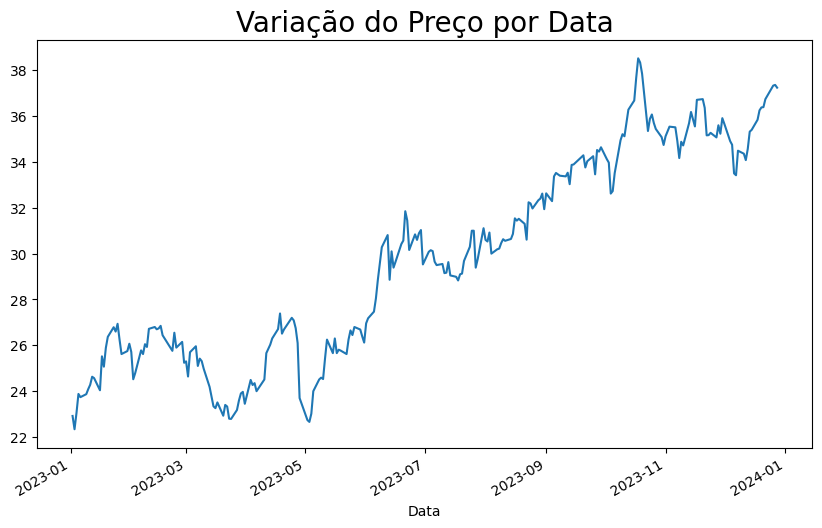

In [ ]:
dados['Fechamento'].plot(figsize=(10,6))
plt.title('Variação do Preço por Data', fontsize=20)
plt.legend('Fechamento')

In [ ]:
df = dados.head(100).copy()
# convertendo o índice em uma coluna de data
df['Data'] = df.index

# convertendo datas para o formato numérico de matplotlib
# NECESSÁRIO PARA PLOTAR AS DATAS CORRETAMENTE NO GRÁFICO COM O MATPLOTLIB
df['Data'] = df['Data'].apply(mdates.date2num) #mdates -> manipulação de data
df

,Abertura,Max,Min,Fechamento,Fechamento_Ajuste,Volume,Data
Data,,,,,,,
2023-01-02,23.540001,23.809999,22.799999,22.920000,17.709478,78424700,19359.0
2023-01-03,22.940001,23.100000,22.129999,22.340000,17.261332,96750300,19360.0
2023-01-04,21.959999,23.590000,21.830000,23.049999,17.809923,129504000,19361.0
2023-01-05,23.340000,24.040001,23.150000,23.879999,18.451235,73886000,19362.0
2023-01-06,23.940001,24.320000,23.549999,23.740000,18.343061,51851500,19363.0
...,...,...,...,...,...,...,...
2023-05-22,25.879999,26.010000,25.500000,25.620001,22.299124,38010200,19499.0
2023-05-23,25.650000,26.430000,25.520000,26.250000,22.847462,58285300,19500.0
2023-05-24,26.250000,26.900000,26.049999,26.650000,23.195612,54796400,19501.0


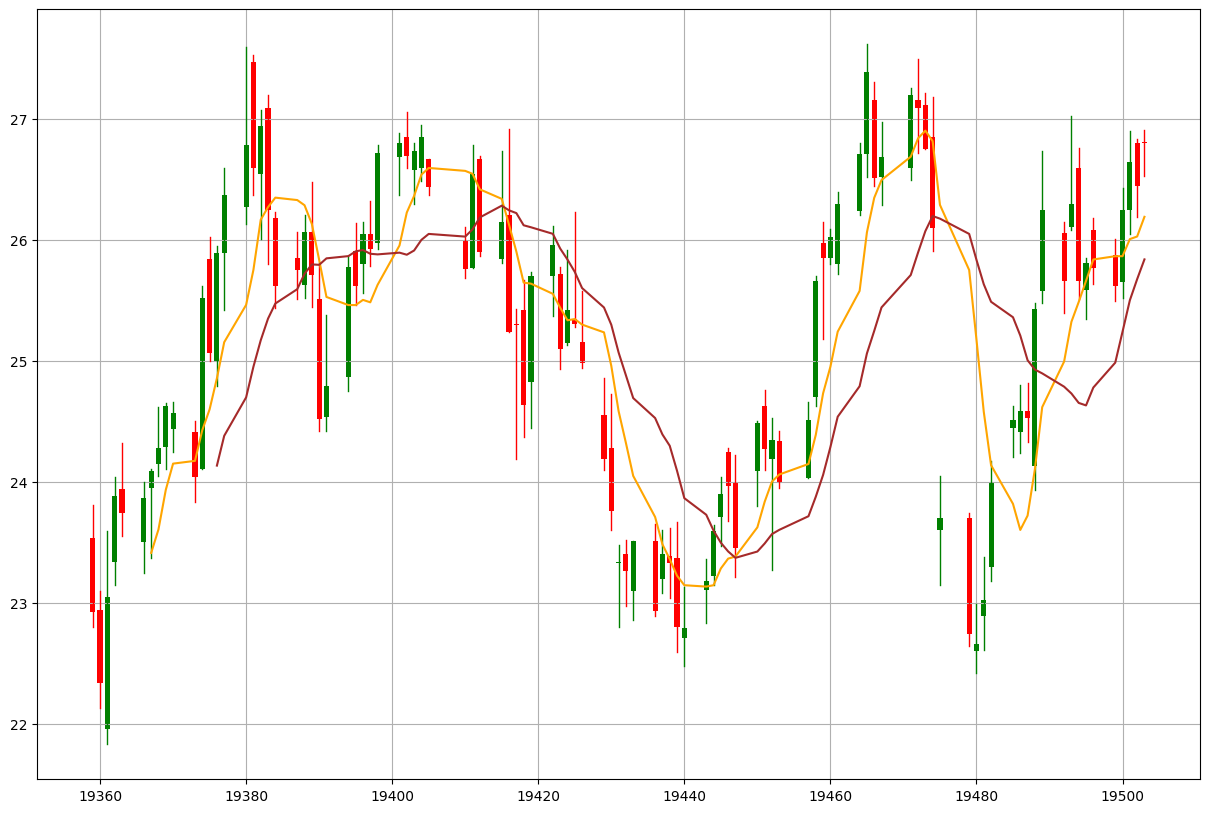

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
# Candles gráfico
width = 0.7

for i in range(len(df)):
  if df['Fechamento'].iloc[i] > df['Abertura'].iloc[i]: # A propriedade iloc obtém ou define os valores dos índices especificados.
    color= 'green'
  else:
    color = 'red'
  ax.plot([df['Data'].iloc[i], df['Data'].iloc[i]],
          [df['Min'].iloc[i], df['Max'].iloc[i]],
          color=color,
          linewidth=1)

  ax.add_patch(plt.Rectangle((df['Data'].iloc[i] - width/2, min(df['Abertura'].iloc[i], df['Fechamento'].iloc[i])),
                            width, abs(df['Fechamento'].iloc[i] - df['Abertura'].iloc[i]), facecolor=color))

df['MA7'] = df['Fechamento'].rolling(window=7).mean()
df['MA14'] = df['Fechamento'].rolling(window=14).mean()

ax.plot(df['Data'], df['MA7'], color='orange', label='Média Móvel 7 dias') # Média para 7 dias
ax.plot(df['Data'], df['MA14'], color='brown', label='Média Móvel 14 dias') # Média para 14 dias
ax.legend()

ax.xaxis_date() #xaxis_date() utiliza as datas no eixo X
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45) # rotação das datas

plt.title('Gráfico Candlestick - PETR4.SA - matplotlib')
plt.xlabel('Data')
plt.ylabel('Preço')

plt.grid(True)
plt.show()

In [6]:
dados = yf.download('AAPL', start='2023-01-01', end='2023-12-31')

[*********************100%%**********************]  1 of 1 completed


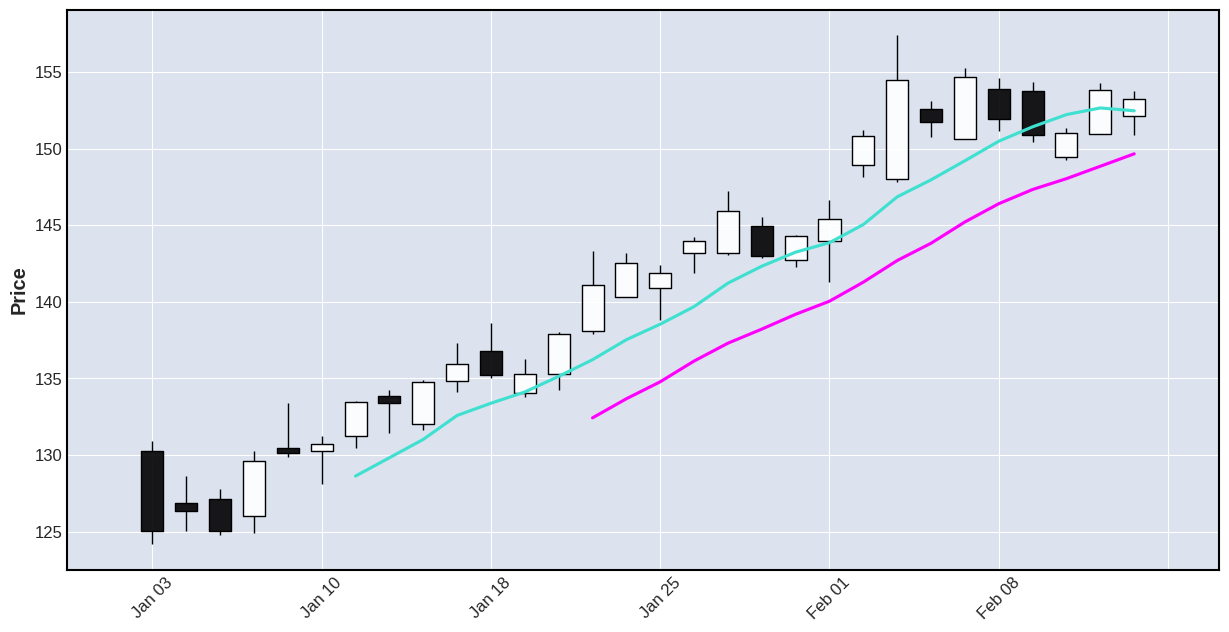

In [8]:
mpf.plot(dados.head(30), type='candle', figsize = (16,8), volume=False, mav=(7,14))